<a href="https://colab.research.google.com/github/zhrvdt77/DSPS_ZVahdat/blob/main/HW2/movies_exploratory_Zahra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import pylab as plt


This is a dataset of movies obtained from Kaggle. which is a platform that hosts data challenges (sometimes for prizes that can earn you a lot of money! the latest one is $50k!!)

In [3]:
movies = pd.read_csv("https://github.com/fedhere/FDSfE_FBianco/blob/main/data/movies_metadata_kaggle.csv.zip?raw=true", compression='zip')

In [4]:
# I am saving the initial size of the data set.
# If I decide to remove rows or columns (for example to deal with NaN values)
# I want to track how many I drop at every step
movies_start_size = movies.shape;
print("Shape: (rows, columns) =", movies_start_size);


Shape: (rows, columns) = (45454, 25)


In [26]:
movies.head();

In [ ]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'earnings'],
      dtype='object')

# Dealing with poor data encoding

The data contains a lot of metrics and descriptive features for 45454 movies. The features tho, are not always encoded in the way we would expect: for example, the "runtime" variable should be a number, but its encoded as an object (i.e. generally a string), see below

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45454 entries, 0 to 45453
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45454 non-null  bool   
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45454 non-null  float64
 3   genres                 45454 non-null  object 
 4   homepage               7777 non-null   object 
 5   id                     45454 non-null  int64  
 6   imdb_id                45437 non-null  object 
 7   original_language      45443 non-null  object 
 8   original_title         45454 non-null  object 
 9   overview               44500 non-null  object 
 10  popularity             45451 non-null  float64
 11  poster_path            45068 non-null  object 
 12  production_companies   45451 non-null  object 
 13  production_countries   45451 non-null  object 
 14  release_date           45368 non-null  object 
 15  re

In [32]:
movies["runtime"][634:650]

634     mean
635     mean
636    106.0
637    117.0
638    110.0
639     85.0
640    123.0
641     86.0
642    100.0
643    103.0
644     mean
645     93.0
646    100.0
647    100.0
648     92.0
649    115.0
Name: runtime, dtype: object

Why is the numerical "runtime" variable encoded as a string? It happens if there are entries that are not numerical in a column that is otherwise numerical

I can convert a feature that contains strings of numbers to a numeric features, but if there are spurious entries I will get an error (_ValueError: Unable to parse string "mean" at position 634_)

In [33]:
movies["runtime"] = pd.to_numeric(movies["runtime"]);

ValueError: ignored

To avoid that I have to "coerce" the conversion, which will make the non-numerical values converted to `NaN` or "Not a number".

In [34]:
movies["runtime"] = pd.to_numeric(movies["runtime"], errors='coerce')

Now lets look at the movie revenue per minute of film.

In [ ]:
movies["revenue"] / movies["runtime"]

0        4.611778e+06
1        2.526897e+06
2        0.000000e+00
3        6.413556e+05
4        7.224426e+05
             ...     
45449    0.000000e+00
45450    0.000000e+00
45451    0.000000e+00
45452    0.000000e+00
45453    0.000000e+00
Length: 45454, dtype: float64

In [ ]:
movies[[isinstance(movies["runtime"].values[i], float) for i in range(len(movies))]]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,earnings
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.090760
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45449,False,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaN
45450,False,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,NaN
45451,False,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,NaN
45452,False,NaN,0.0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,NaN


# Dealing with NaN and Infinities

now look at the description of the dataset. There are a few things to notice:

- first, the "count" is not the same. But all columns have 45454 rows!! Yes, but not all are "valid" rows. Count tells you the number of non-NaN entires. After the conversion, for runtime that is 45194.

- second, the variable "earnings" containes lots of NaN and also infinities. This is skewing all the statistics for this column! (note: I created that column, it was not originally in the dataset. Its revenue / budget and since budget has 0 values in it I get infinities in the fraction)

In [ ]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,earnings
count,4.545400e+04,45454.000000,45451.000000,4.545100e+04,45194.000000,45451.000000,45451.000000,1.091600e+04
mean,4.225399e+06,108348.389075,2.921765,1.121157e+07,94.133093,5.618543,109.917538,inf
std,1.742576e+07,112445.975875,6.005910,6.433842e+07,38.406223,1.924085,491.356914,NaN
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,26447.500000,0.385945,0.000000e+00,85.000000,5.000000,3.000000,0.000000e+00
50%,0.000000e+00,60004.000000,1.127613,0.000000e+00,95.000000,6.000000,10.000000,1.273533e+00
75%,0.000000e+00,157304.000000,3.679334,0.000000e+00,107.000000,6.800000,34.000000,7.267308e+00
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,inf


how many NaN do we have in each row?

In [35]:
movies.isna().sum(axis=0)

adult                        0
belongs_to_collection    40963
budget                       0
genres                       0
homepage                 37677
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   3
poster_path                386
production_companies         3
production_countries         3
release_date                86
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25048
title                        3
video                        3
vote_average                 3
vote_count                   3
earnings                 34538
dtype: int64

how many NaN _or infinities_ do we have in each row?

In [ ]:
movies.isnull().sum(axis=0)

adult                        0
belongs_to_collection    40963
budget                       0
genres                       0
homepage                 37677
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   3
poster_path                386
production_companies         3
production_countries         3
release_date                86
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25048
title                        3
video                        3
vote_average                 3
vote_count                   3
earnings                 34538
dtype: int64

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45454 entries, 0 to 45453
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45454 non-null  bool   
 1   belongs_to_collection  4491 non-null   object 
 2   budget                 45454 non-null  float64
 3   genres                 45454 non-null  object 
 4   homepage               7777 non-null   object 
 5   id                     45454 non-null  int64  
 6   imdb_id                45437 non-null  object 
 7   original_language      45443 non-null  object 
 8   original_title         45454 non-null  object 
 9   overview               44500 non-null  object 
 10  popularity             45451 non-null  float64
 11  poster_path            45068 non-null  object 
 12  production_companies   45451 non-null  object 
 13  production_countries   45451 non-null  object 
 14  release_date           45368 non-null  object 
 15  re

# Using the missingno package to visualize the null and NaN content of our dataset

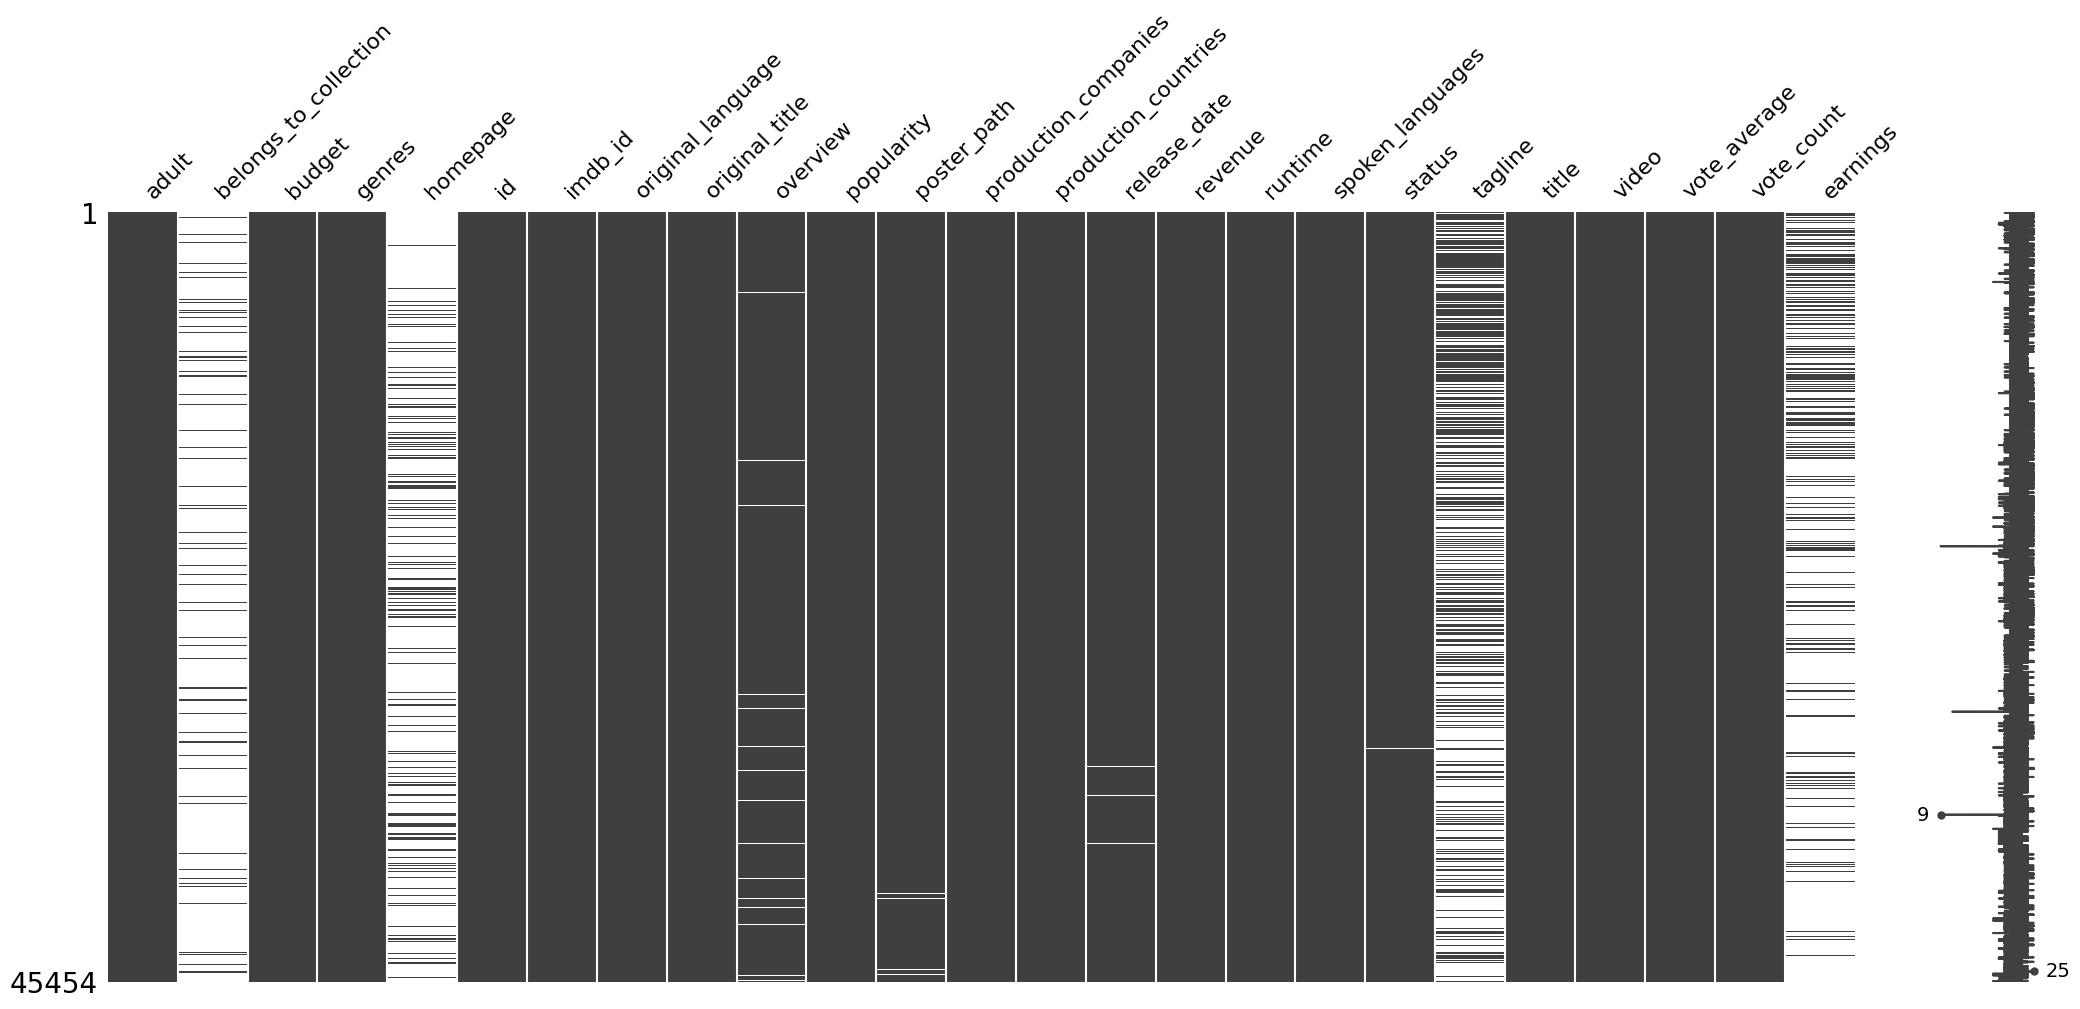

In [5]:
import missingno as msno
msno.matrix(movies);

Figure 1: This plot shows in white NaN cells and in gray valid cells for each feature as collumns. The "sparkline" plot on the right shows the number of valid entries per row. The lowest and highest number are marked explicitly: the row with more NaNs has only 8 valid entries, the most complete row(s) have all 25 values.

In [54]:
msno.matrix?

In [55]:
msno.heatmap?

<Axes: >

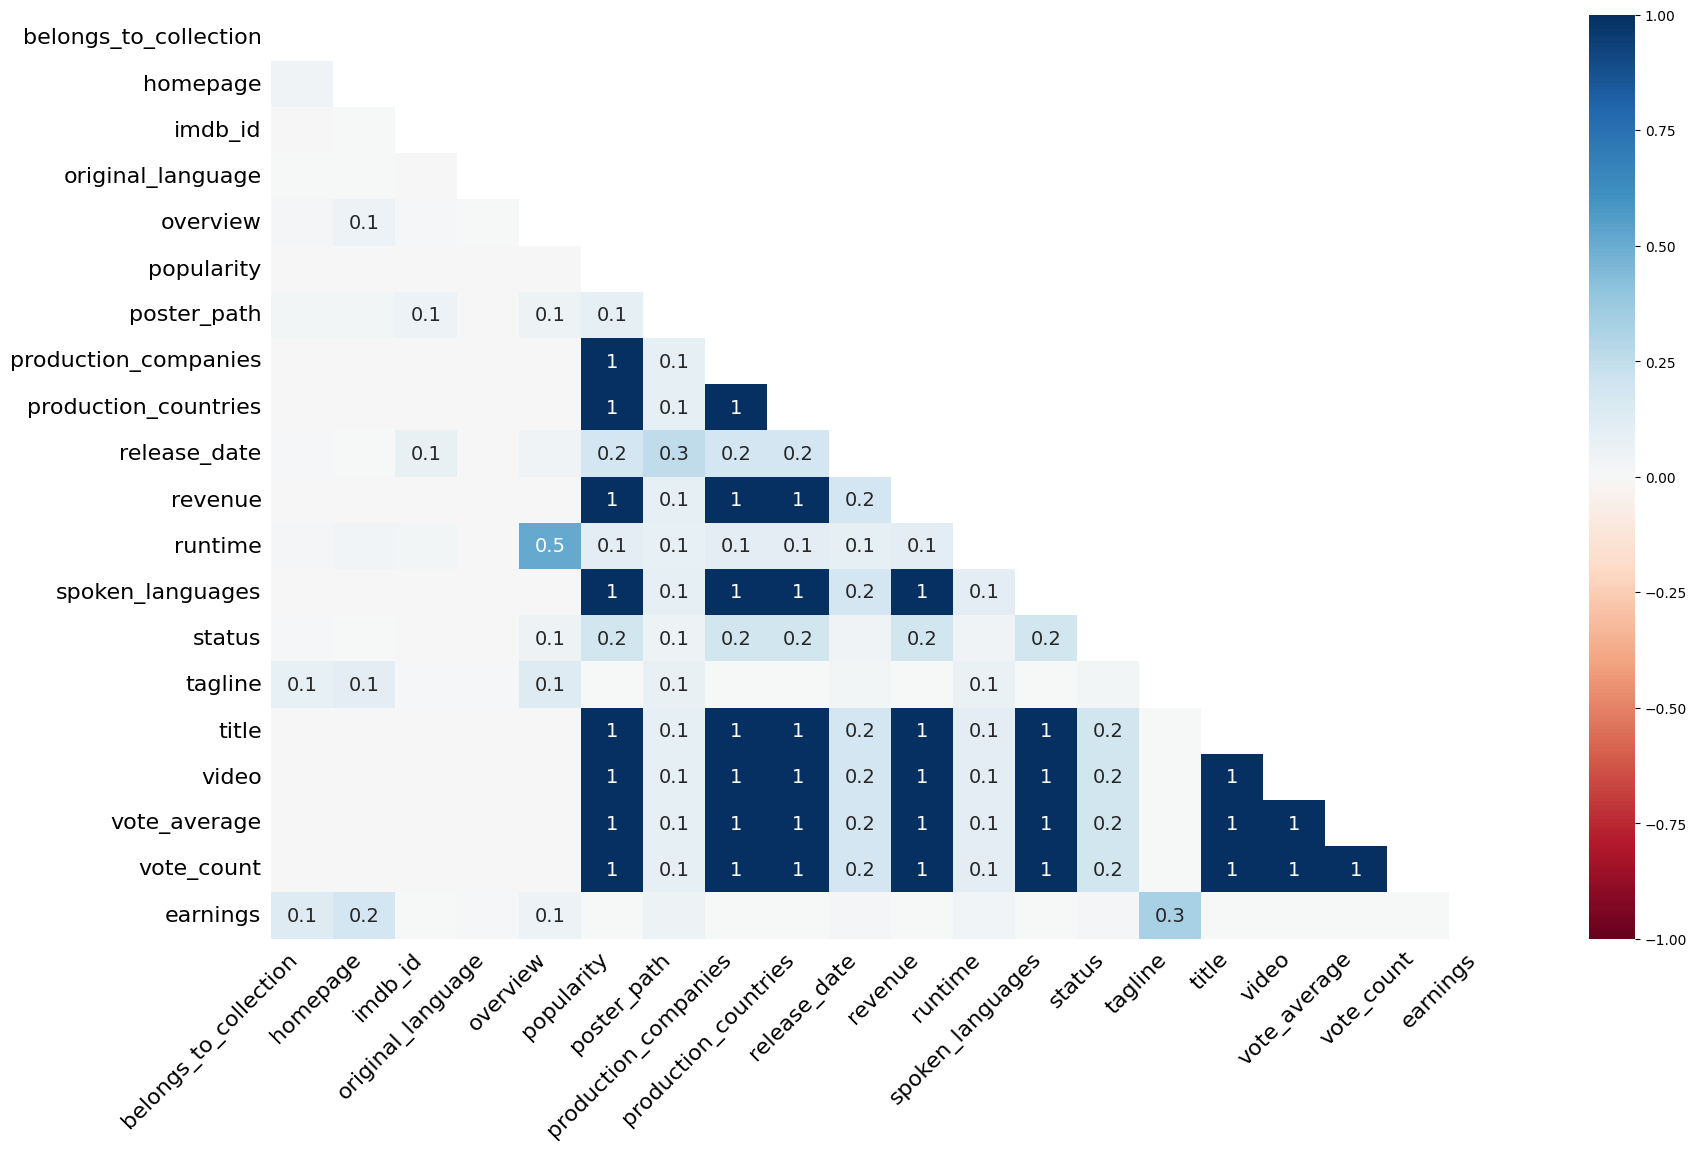

In [56]:
#Presents a `seaborn` heatmap visualization of
#nullity correlation in the given DataFrame.
msno.heatmap(movies)

Figure 2: This plot shows how correlated the presence of missing values is. Pairs of olumns for which all the same rows are missing are going to have a value of 1 in this plot. 0 if the rows that are missing in one column are all present in the other

In [8]:
movies.revenue

0        373554033.0
1        262797249.0
2                0.0
3         81452156.0
4         76578911.0
            ...     
45449            0.0
45450            0.0
45451            0.0
45452            0.0
45453            0.0
Name: revenue, Length: 45454, dtype: float64

In [9]:
movies.budget

0        30000000.0
1        65000000.0
2               0.0
3        16000000.0
4               0.0
            ...    
45449           0.0
45450           0.0
45451           0.0
45452           0.0
45453           0.0
Name: budget, Length: 45454, dtype: float64

Number of movies for which popularity is not defined (NaN or inf)

In [60]:
# note that movies.popularity is (in most cases) the same as movies["popularity"]
movies.popularity.isnull().sum()

3

In [65]:
np.round(.0103,4)

0.0103

Fraction of movies for which "popularity" is not defined


In [10]:
movies.popularity.isnull().sum() / len(movies.popularity) # too many decimal digits!!

6.600079200950411e-05

In [61]:
print("Fraction of movies with missing popularity score",
      np.round(movies.popularity.isnull().sum() / len(movies.popularity), 4))

Fraction of movies with missing popularity score 0.0001


# Filling in missing values with the mean value

In [ ]:
movies["runtime"].fillna(movies["runtime"].mean(), inplace=True)

In [ ]:
movies.popularity.fillna(movies.popularity.mean(), inplace=True)

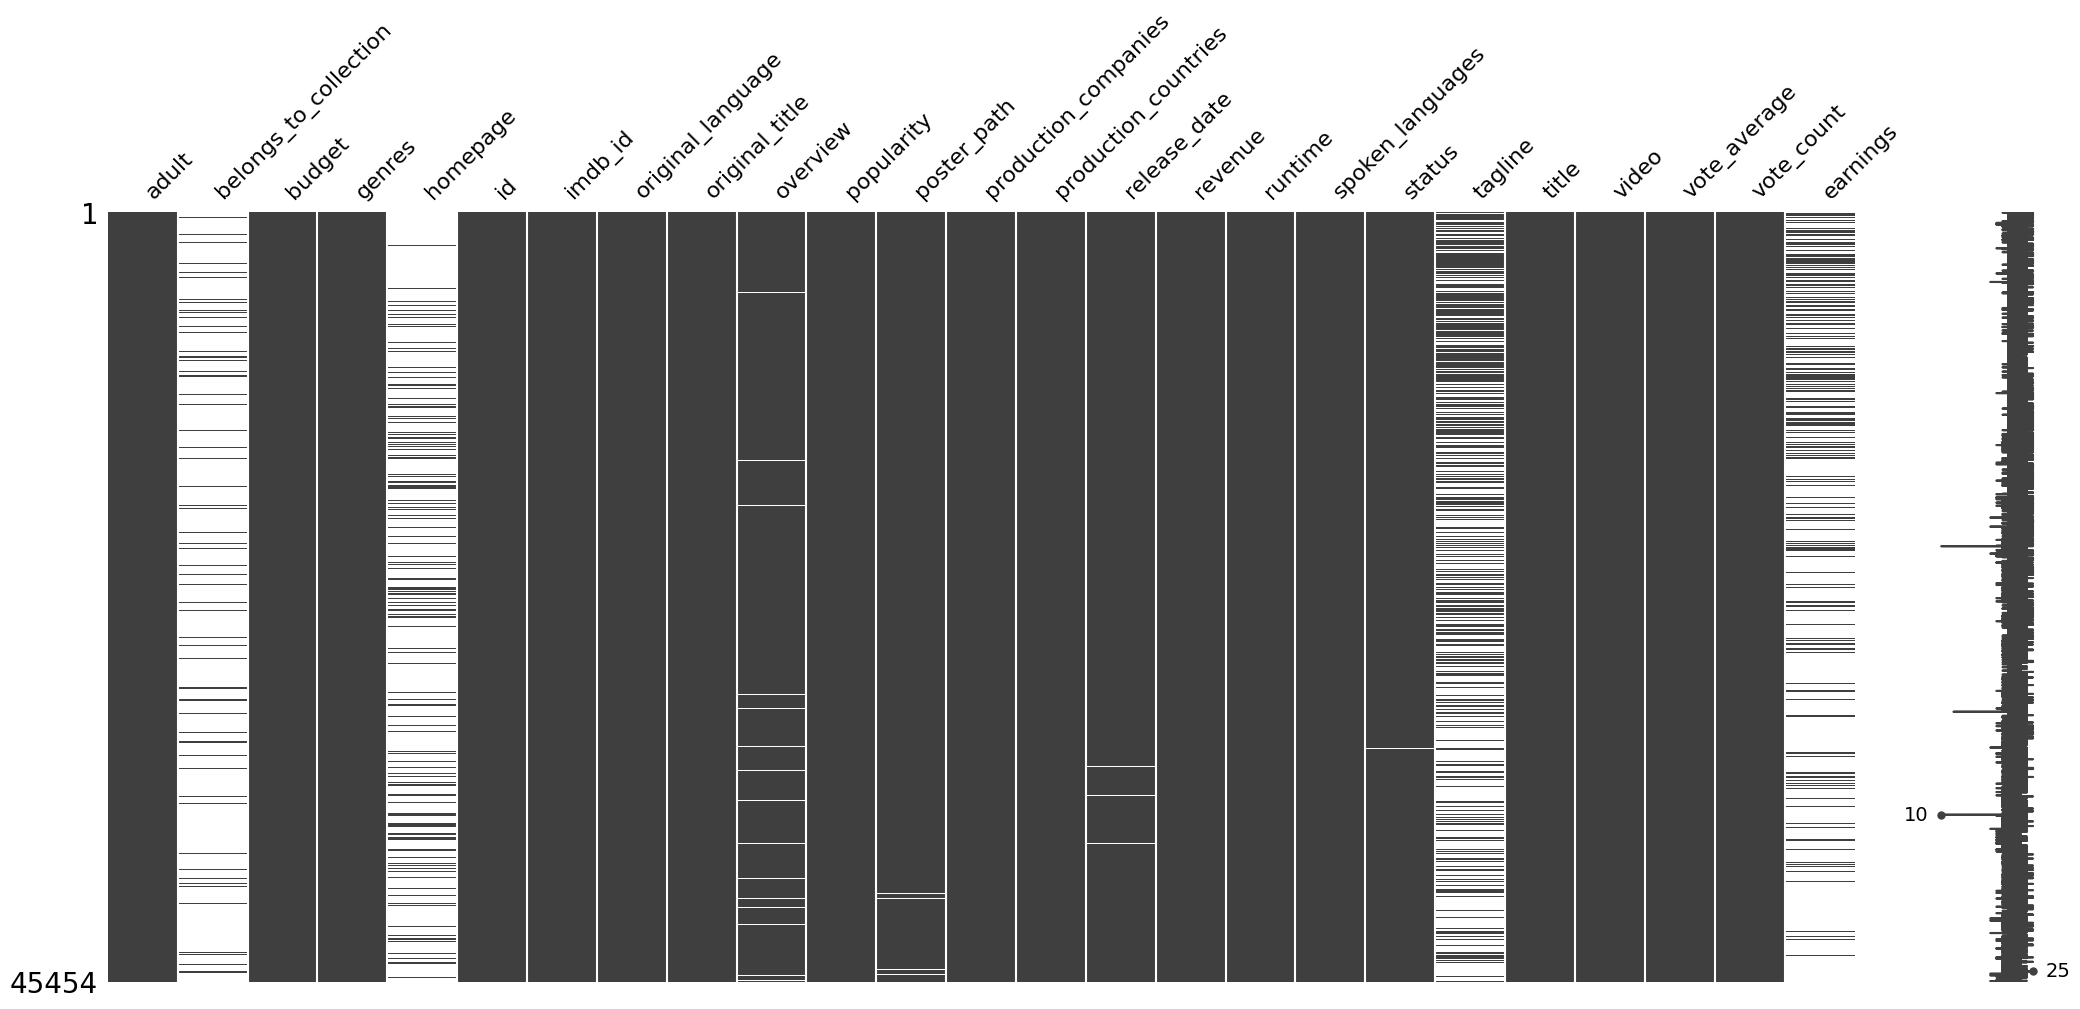

In [ ]:
msno.matrix(movies);

Figure 3 : same as before, but since I filled in missing values for runtime and popularity with the respective means now the columns are solid gray (all values available) and the row with fewest columns now has 10, not 8 (I guess it was missing both popularity and runtime!!)

Here is another way to convert a feature (column) made of strings containing (mostly) numbers to a floating point value feature

In [12]:
movies['budget'] = movies.budget.astype(float, errors='ignore')
movies['revenue'] = movies.revenue.astype(float, errors='ignore')

In [21]:
movies['budget'].isna().sum()

0

In [ ]:
plt.hist('budget')
plt.xticks([0])

# Lets plot some distribution of values. What is the right number of bins?
There is a discussion on this in slack!

<Figure size 640x480 with 0 Axes>

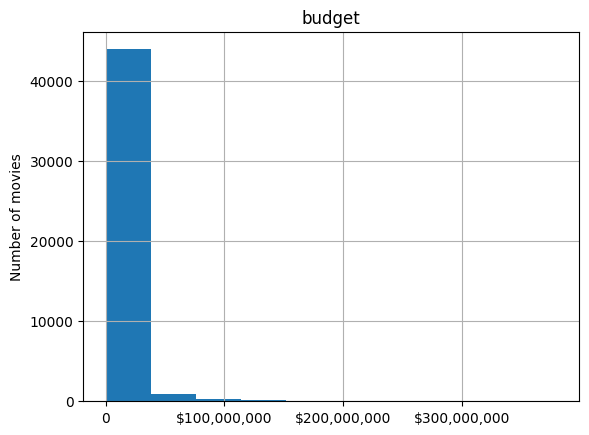

In [84]:
fig = plt.figure()
movies.hist('budget')
plt.xticks([0,1e8,2e8,3e8], labels=["0", "$100,000,000", "$200,000,000", "$300,000,000"]);
plt.ylabel("Number of movies");

Figure 4:  Too few bins. All I can tell is that most values are small (smaller than 30000000)

<Figure size 640x480 with 0 Axes>

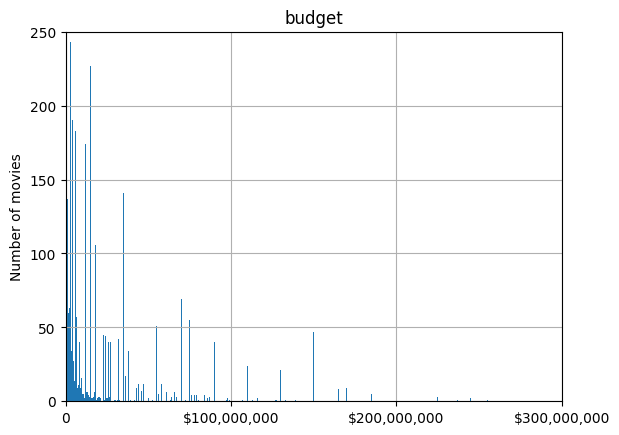

In [102]:
fig = plt.figure()
movies.hist('budget', bins=int(np.sqrt(3000000)));
plt.xticks([0,1e8,2e8,3e8], labels=["0", "$100,000,000", "$200,000,000", "$300,000,000"]);
plt.ylabel("Number of movies");
plt.xlim([0,300000000])
plt.ylim(0,250); # I had to cut the y range to see this

Figure 5:  Too many bins. Now I see spikes everywhere, I am plotting noise.

# there appear to be some movies (36810) made for less that 1,000 dollars... In faft for $0. I dont believe these are correct entries. I think this means that the person that curated the data set it to 0 where they should have set it to NaN

In [103]:
movies[movies.budget < 1e3];

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,earnings
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,inf
7,False,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0,NaN
11,False,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",NaN,12110,tt0112896,en,Dracula: Dead and Loving It,When a lawyer shows up at the vampire's doorst...,...,0.0,88.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Dracula: Dead and Loving It,False,5.7,210.0,NaN
12,False,"{'id': 117693, 'name': 'Balto Collection', 'po...",0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",NaN,21032,tt0112453,en,Balto,An outcast half-wolf risks his life to prevent...,...,11348324.0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Part Dog. Part Wolf. All Hero.,Balto,False,7.1,423.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45449,False,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaN
45450,False,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,NaN
45451,False,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,NaN
45452,False,NaN,0.0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,NaN


This can cause problems. For example: what if I want to know what the net profit for a movie is (revenue / budget)

In [ ]:
movies.revenue.astype(float) / movies.budget.astype(float)

0        12.451801
1         4.043035
2              NaN
3         5.090760
4              inf
           ...    
45449          NaN
45450          NaN
45451          NaN
45452          NaN
45453          NaN
Length: 45454, dtype: float64

In [3]:
movies.revenue.astype(float)

0        373554033.0
1        262797249.0
2                0.0
3         81452156.0
4         76578911.0
            ...     
45449            0.0
45450            0.0
45451            0.0
45452            0.0
45453            0.0
Name: revenue, Length: 45454, dtype: float64

<Figure size 640x480 with 0 Axes>

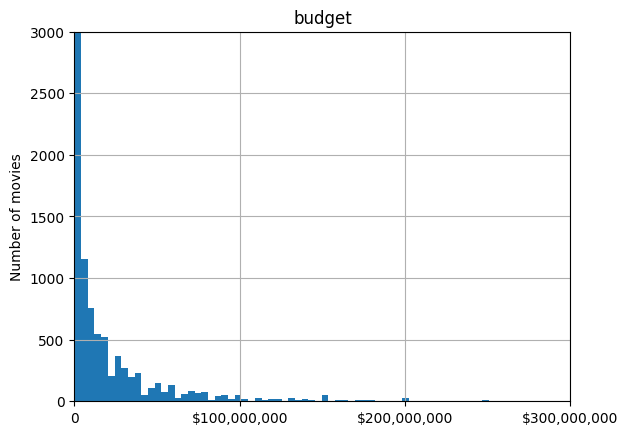

In [108]:
fig = plt.figure()
movies[movies.budget>0].hist('budget', bins=int(np.sqrt(len(movies[movies.budget>0]))));
plt.xticks([0,1e8,2e8,3e8], labels=["0", "$100,000,000", "$200,000,000", "$300,000,000"]);
plt.ylabel("Number of movies");
plt.xlim([0,300000000])
plt.ylim(0,3000); # I had to cut the y range to see this

<Figure size 640x480 with 0 Axes>

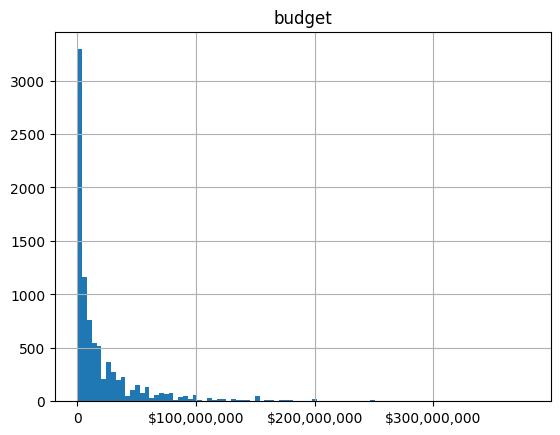

In [109]:
fig = plt.figure()
movies[movies.budget > 0].hist('budget', bins=int(np.sqrt((movies.budget > 0).sum())));
plt.xticks([0,1e8,2e8,3e8], labels=["0", "$100,000,000", "$200,000,000", "$300,000,000"]);

Figure 6:  Much better number of bins! this was sqrt(size of sample).

# Remove from the dataset all movies with $0 budget

In [4]:
movies.shape
#(movies.budget == 0).sum()

(45454, 25)

In [36]:
(movies.budget == 0).sum()

36565

In [112]:
(movies.budget == 0).sum() / movies.shape[0]

0.8044396532758393

In [120]:
movies_start_size[0]

45454

In [117]:
movies = movies[movies.budget > 0]
movies.shape

(8889, 25)

In [126]:
format((movies_start_size[0]-movies.shape[0])*100/movies_start_size[0])

'80.44396532758392'

In [128]:
print("{:.2f}%".format((movies_start_size[0]-movies.shape[0])*100/movies_start_size[0]))

80.44%


In [114]:
print("new dataset size (rows, columns) =",  movies.shape)
print("I lost {:.2f}% of the data".format((movies_start_size[0] - movies.shape[0])
/ movies_start_size[0] * 100 )) #.2f here means use only 2 decimal digits

new dataset size (rows, columns) = (8889, 25)
I lost 80.44% of the data


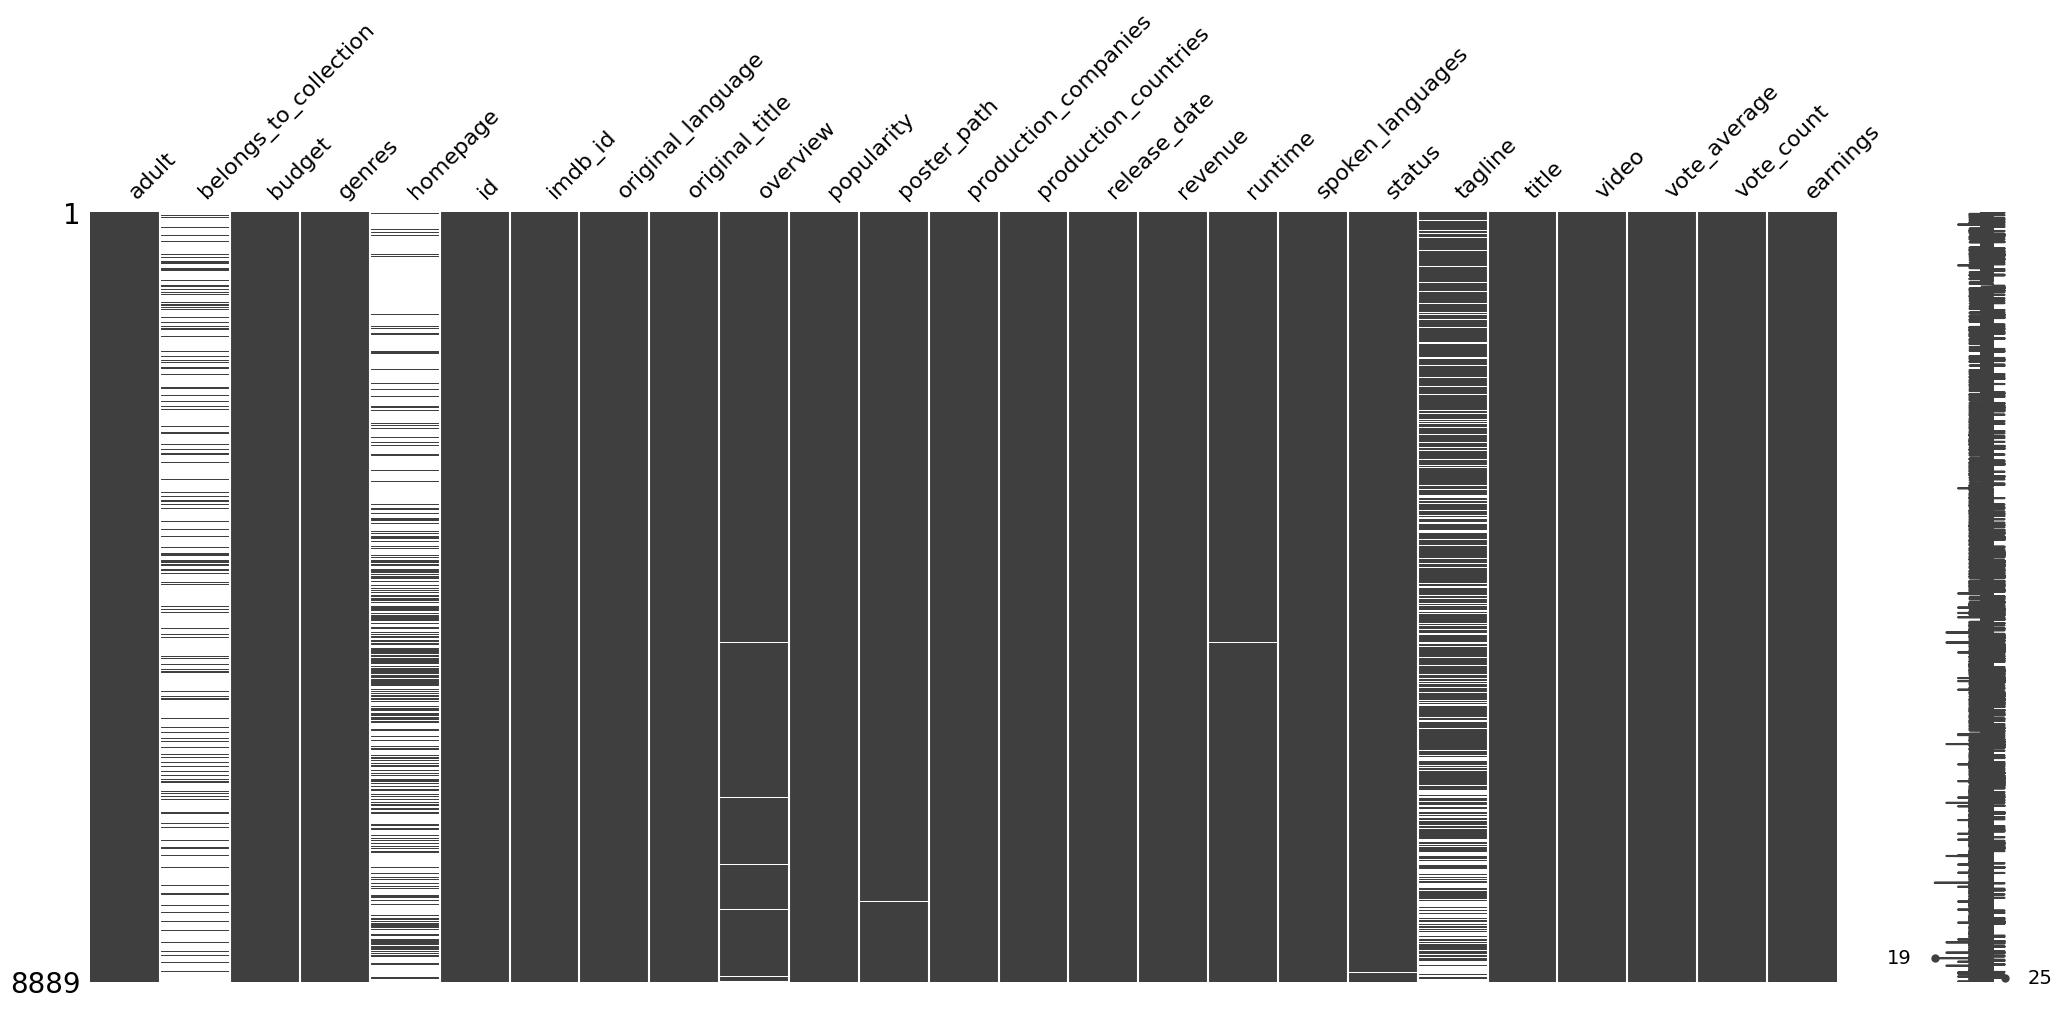

In [129]:
msno.matrix(movies);

Figure 6: now the least populated column has 20 entries!

In [151]:
movies.sort_values(by="earnings", ascending=True);

In [146]:
movies.sort_values(by="budget", ascending=True);

In [147]:
movies.sort_values(by="earnings", ascending=True);
movies.sort_values(by="earnings", ascending=False);

In [5]:
# remove entries with infinite earnings
movies.shape

(45454, 25)

In [40]:
movies.earnings.isin([np.inf]).sum()

2027

In [3]:
movies[~movies.earnings.isin([np.inf])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,earnings
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,4.043035
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,5.090760
5,False,NaN,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,3.123947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45449,False,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,NaN
45450,False,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,NaN
45451,False,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,NaN
45452,False,NaN,0.0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,NaN


In [44]:
movies = movies[~movies.earnings.isin([np.inf])]

In [45]:
movies.earnings.isin([np.inf]).sum()

0

In [46]:
movies_start_size

(45454, 25)

In [155]:
movies.shape

(8889, 25)

In [ ]:
print("we lost {:.2f}% of the movies".format((movies_start_size[0] - movies.shape[0]) /
                                          movies_start_size[0] * 100))

we lost 80.44% of the movies


In [15]:
movies.sort_values(by="earnings", ascending=True);

In [16]:
ax = movies.hist(column='runtime', bins = int(np.sqrt(len(movies))))
ax[0][0].set_xlabel("runtime (minutes)");

ValueError: ignored

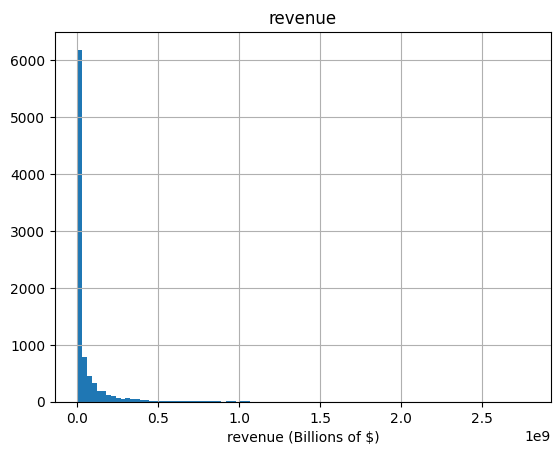

In [ ]:
ax = movies.hist(column='revenue', bins = int(np.sqrt(len(movies))))
ax[0][0].set_xlabel("revenue (Billions of $)");

#Consider only the low budget movies

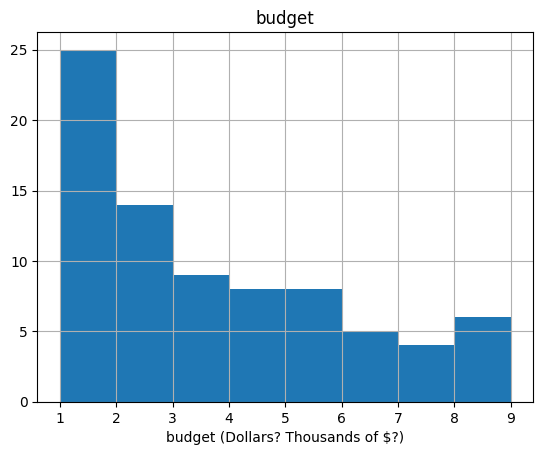

In [ ]:
nbins = int(np.sqrt(len(movies[movies.budget < 10])))
ax = movies[movies.budget < 10].hist(column='budget',
                    bins = nbins)
ax[0][0].set_xlabel("budget (Dollars? Thousands of $?)");

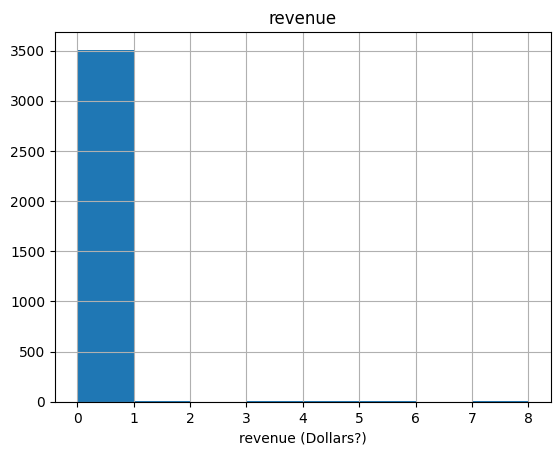

In [ ]:
ax = movies[movies.revenue < 10].hist(column='revenue',bins = nbins)
ax[0][0].set_xlabel("revenue (Dollars?)");

In [ ]:
print("There are {} movies with $0 revenue".format((movies["revenue"]==0).sum()))

There are 3508 movies with $0 revenue


In [ ]:
#remove low budget moveis
movies = movies[movies.budget.astype(float) > 1e5]


In [ ]:
print("we lost {:.2f}% of the movies".format((movies_start_size[0] - movies.shape[0]) /
                                          movies_start_size[0] * 100))

we lost 81.75% of the movies


In [52]:
movies_num

,budget,id,popularity,revenue,runtime,vote_average,vote_count,earnings
0,30000000.0,862,21.946943,373554033.0,81.0,7.7,5415.0,12.451801
1,65000000.0,8844,17.015539,262797249.0,104.0,6.9,2413.0,4.043035
2,0.0,15602,11.712900,0.0,101.0,6.5,92.0,NaN
3,16000000.0,31357,3.859495,81452156.0,127.0,6.1,34.0,5.090760
5,60000000.0,949,17.924927,187436818.0,170.0,7.7,1886.0,3.123947
...,...,...,...,...,...,...,...,...
45449,0.0,439050,0.072051,0.0,90.0,4.0,1.0,NaN
45450,0.0,111109,0.178241,0.0,360.0,9.0,3.0,NaN
45451,0.0,67758,0.903007,0.0,90.0,3.8,6.0,NaN
45452,0.0,227506,0.003503,0.0,87.0,0.0,0.0,NaN


# Top 5 earning movies (now that we do not have nans or infinities in that column)

In [ ]:
movies_num.sort_values(by="earnings")[:5]

,budget,id,popularity,revenue,runtime,vote_average,vote_count,earnings
12651,222000.0,51929,0.151224,0.0,122.0,7.5,7.0,0.0
5512,226188.0,11868,8.355326,0.0,82.0,7.2,124.0,0.0
19301,8978040.0,93188,2.023954,0.0,139.0,6.7,24.0,0.0
19283,1552334.0,51190,0.368020,0.0,112.0,6.3,9.0,0.0
19278,6000000.0,20499,4.421468,0.0,92.0,4.1,14.0,0.0


In [54]:
movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'earnings'],
      dtype='object')

# Consider only numerical columns - create a separate DF for them

In [8]:
movies_num = movies.select_dtypes(include=np.number)
movies_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45454 entries, 0 to 45453
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        45454 non-null  float64
 1   id            45454 non-null  int64  
 2   popularity    45451 non-null  float64
 3   revenue       45451 non-null  float64
 4   vote_average  45451 non-null  float64
 5   vote_count    45451 non-null  float64
 6   earnings      10916 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.4 MB


In [4]:
movies_num.corr()

,budget,id,popularity,revenue,vote_average,vote_count,earnings
budget,1.000000,-0.101672,0.449644,0.768774,0.073465,0.676639,-0.012566
id,-0.101672,1.000000,-0.083499,-0.071262,-0.167600,-0.064897,-0.010124
popularity,0.449644,-0.083499,1.000000,0.506180,0.154378,0.559966,-0.003940
revenue,0.768774,-0.071262,0.506180,1.000000,0.083852,0.812021,-0.005509
vote_average,0.073465,-0.167600,0.154378,0.083852,1.000000,0.123590,0.013159
vote_count,0.676639,-0.064897,0.559966,0.812021,0.123590,1.000000,-0.003033
earnings,-0.012566,-0.010124,-0.003940,-0.005509,0.013159,-0.003033,1.000000


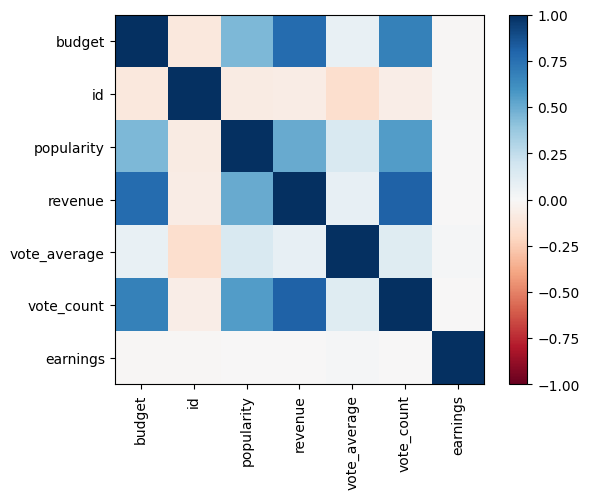

In [8]:
plt.imshow(movies_num.corr(), clim=(-1,1), cmap="RdBu")
plt.xticks(range(movies_num.shape[1]), movies_num.columns, rotation=90);
plt.yticks(range(movies_num.shape[1]), movies_num.columns);
plt.colorbar()

In [66]:
movies_num.columns

Index(['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'earnings'],
      dtype='object')

Figure X: the features are all postive correlated (id is weakly negative correlated with some values but id is an index and therefore it should not matter! unless it is a progressive number with the data of release, in which case.... we could argue its interesting to see that it goes done when popularity and revenue go up. BUT: the value is too small to assume it will be statistically consistent!!!)

# Pair plot
A pair plot shows the linear correlation between features as a scatter plot (one feature on the x, one on the y, and the distribution of each feature on the diagonal line).
The graphical package Seaborn has a nice function for it

KeyboardInterrupt: ignored

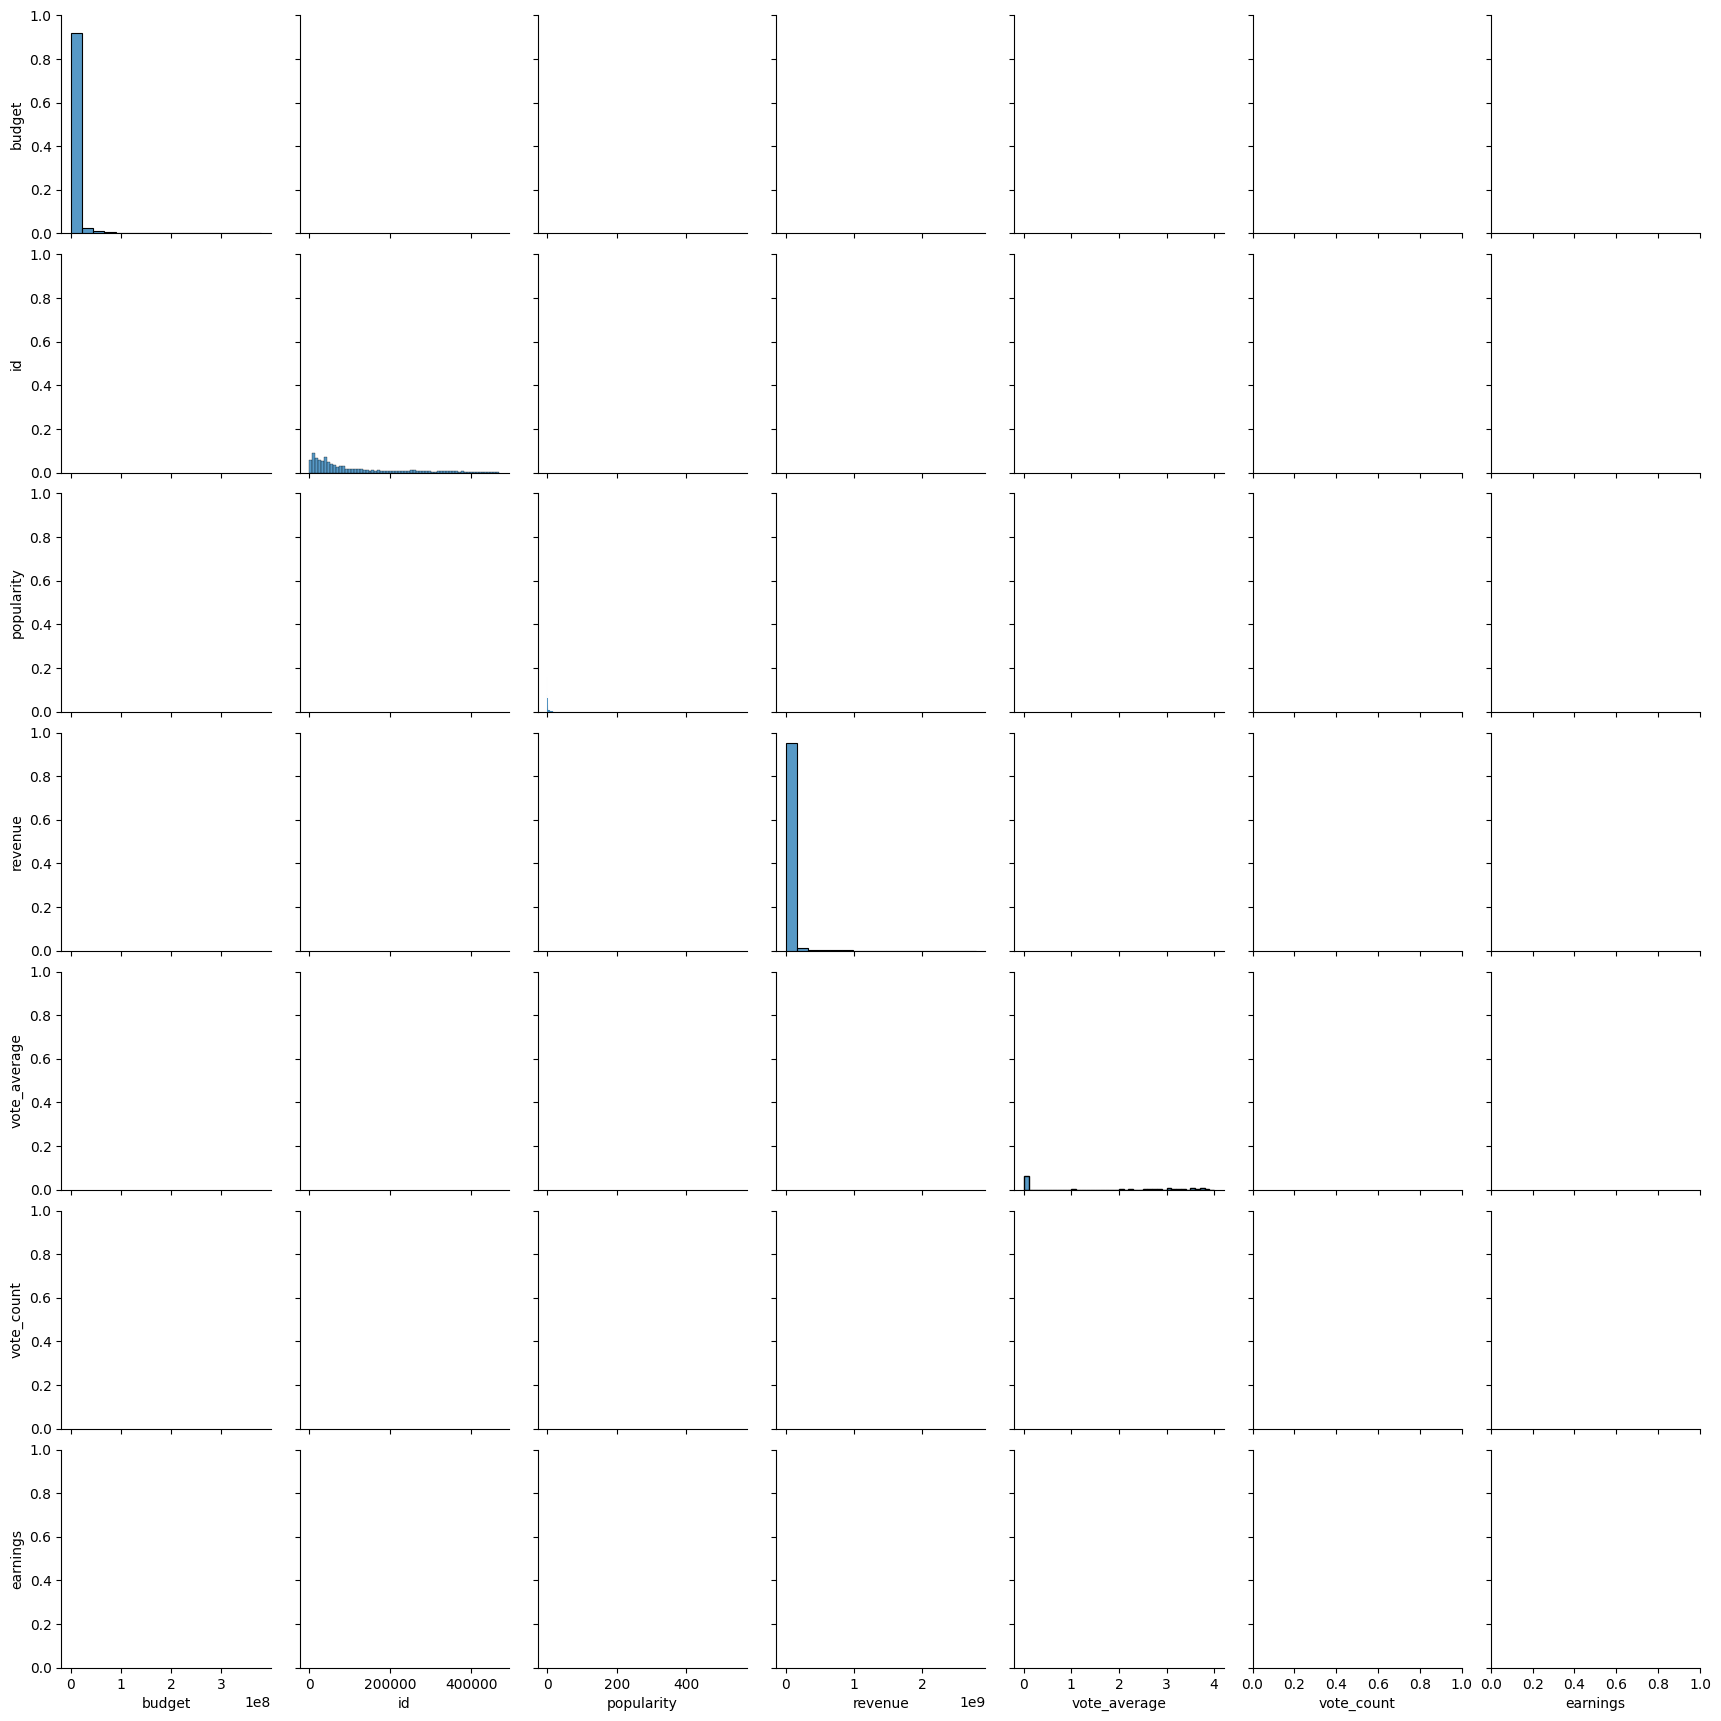

In [5]:
import seaborn as sns
sns.pairplot(movies_num)

<Axes: >

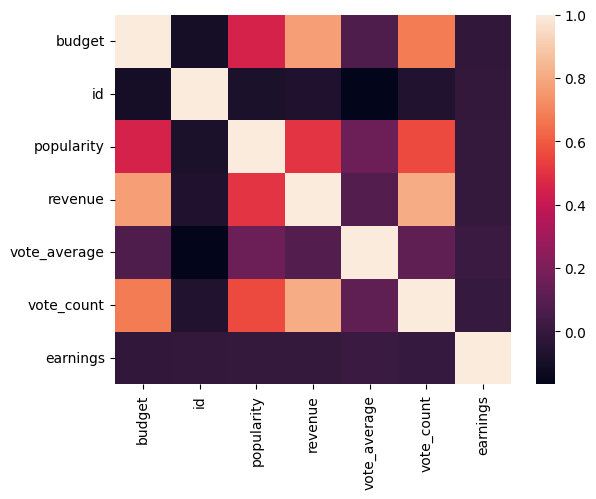

In [6]:
# Seaborn also has its own heatmap function
import seaborn as sns
corr = movies_num.corr()
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns)